In [1]:
%matplotlib inline

In [2]:
from __future__ import division, print_function, unicode_literals
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
!ls -lah && pwd

total 2240
drwxr-xr-x  9 i869007  staff   288B Sep  8 18:17 .
drwxr-xr-x  4 i869007  staff   128B Feb 20  2020 ..
drwxr-xr-x  8 i869007  staff   256B Sep  8 18:17 .ipynb_checkpoints
-rw-r--r--  1 i869007  staff   371K Feb 20  2020 Auto.ipynb
-rw-r--r--@ 1 i869007  staff   316K Feb 20  2020 Boston.ipynb
-rw-r--r--  1 i869007  staff    36K Sep  4 13:47 Chapter3.ipynb
-rw-r--r--  1 i869007  staff    72B Sep  8 18:17 Classification.ipynb
-rw-r--r--@ 1 i869007  staff   376K Feb 20  2020 College.ipynb
-rw-r--r--  1 i869007  staff    14K Sep  4 12:09 Linear Regression.ipynb
/Users/i869007/Desktop/Study/CS/Books/ISLR/src/Labs


In [9]:
df=pd.read_csv('../../data/Caravan.csv',usecols=[i for i in range(1,87)])

In [46]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOSTYPE   5822 non-null   int64 
 1   MAANTHUI  5822 non-null   int64 
 2   MGEMOMV   5822 non-null   int64 
 3   MGEMLEEF  5822 non-null   int64 
 4   MOSHOOFD  5822 non-null   int64 
 5   MGODRK    5822 non-null   int64 
 6   MGODPR    5822 non-null   int64 
 7   MGODOV    5822 non-null   int64 
 8   MGODGE    5822 non-null   int64 
 9   MRELGE    5822 non-null   int64 
 10  MRELSA    5822 non-null   int64 
 11  MRELOV    5822 non-null   int64 
 12  MFALLEEN  5822 non-null   int64 
 13  MFGEKIND  5822 non-null   int64 
 14  MFWEKIND  5822 non-null   int64 
 15  MOPLHOOG  5822 non-null   int64 
 16  MOPLMIDD  5822 non-null   int64 
 17  MOPLLAAG  5822 non-null   int64 
 18  MBERHOOG  5822 non-null   int64 
 19  MBERZELF  5822 non-null   int64 
 20  MBERBOER  5822 non-null   int64 
 21  MBERMIDD  5822

In [19]:
X=df.loc[:, df.columns != 'Purchase']
y=df['Purchase'].map({'Yes': 1, 'No': 0})

In [23]:
from sklearn.model_selection import train_test_split
def train_test_spliting(df):
    train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)
    return train_set,test_set

In [24]:
X_train,X_test=train_test_spliting(X)
y_train,y_test=train_test_spliting(y)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [29]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [30]:
X_train_tr = num_pipeline.fit_transform(X_train)

In [ ]:
# 1 Neighbor

In [47]:
neighbors=1
model=KNeighborsClassifier(n_neighbors=neighbors,n_jobs=1)
model.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [48]:
y_pred=model.predict(X_test)

In [49]:
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[1019   65]
 [  72    9]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1084
           1       0.12      0.11      0.12        81

    accuracy                           0.88      1165
   macro avg       0.53      0.53      0.53      1165
weighted avg       0.88      0.88      0.88      1165

Accuracy Score
0.8824034334763948


In [51]:
# https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification
#  Using cross-validation for parameter turning
from sklearn.model_selection import cross_val_score

k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())




<Figure size 432x288 with 0 Axes>

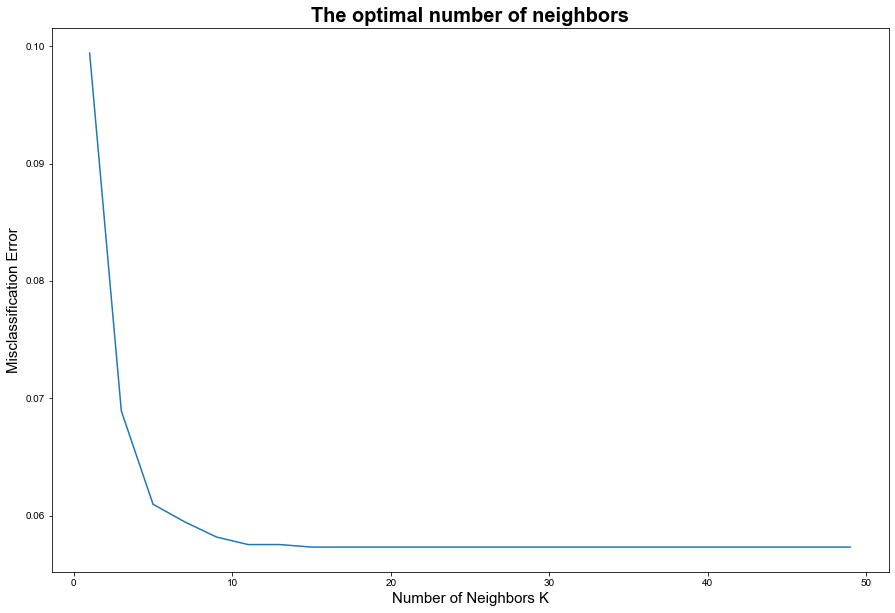

In [53]:
import seaborn as sns

MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [54]:
# finding best k

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 15.


In [64]:
# Using best k
neighbors=15
model=KNeighborsClassifier(n_neighbors=neighbors,n_jobs=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[1084    0]
 [  81    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1084
           1       0.00      0.00      0.00        81

    accuracy                           0.93      1165
   macro avg       0.47      0.50      0.48      1165
weighted avg       0.87      0.93      0.90      1165

Accuracy Score
0.9304721030042918


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
